Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
# Import required libraries

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :

from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('/content/gdrive/MyDrive/ML_Projects/Train')
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/ML_Projects/Test')

In [4]:
# Count images in train and test folders

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
# Set parameters

batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
# train_ds = ##todo
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
# val_ds = ##todo
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

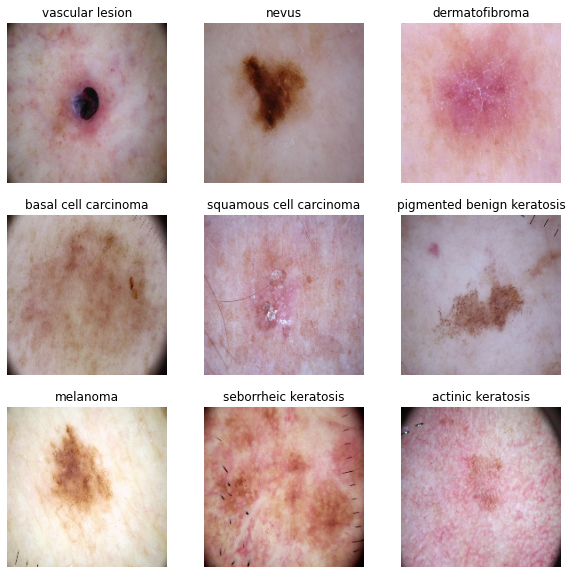

In [10]:
import matplotlib.pyplot as plt
### your code goes here, you can use training or validation data to visualize

l=[]
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
    subplot_num=0
    for i in range(32):        
        if class_names[labels[i]] not in l:
            l.append(class_names[labels[i]])
            ax = plt.subplot(3, 3, subplot_num + 1)
            subplot_num+=1            
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [20]:
### Your code goes here

num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Flatten(),  
  layers.Dense(512, activation='relu'),
  layers.Dense(512, activation='relu'),

  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [21]:
### Todo, choose an appropirate optimiser and loss function
# Adam optimizer and SparseCategoricalCrossentropy loss function are chosen for this model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
# View the summary of all layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 90, 90, 64)        36928     
                                                      

### Train the model

In [23]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 12s 192ms/step - loss: 2.0525 - accuracy: 0.2009 - val_loss: 2.0290 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 10s 186ms/step - loss: 2.0325 - accuracy: 0.1763 - val_loss: 2.0294 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 10s 186ms/step - loss: 2.0641 - accuracy: 0.2087 - val_loss: 2.0296 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 10s 186ms/step - loss: 2.0238 - accuracy: 0.1970 - val_loss: 2.0400 - val_accuracy: 0.1499
Epoch 5/20
56/56 [==============================] - 10s 186ms/step - loss: 2.0207 - accuracy: 0.1853 - val_loss: 2.0649 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 11s 188ms/step - loss: 2.0154 - accuracy: 0.1959 - val_loss: 2.0827 - val_accuracy: 0.1924
Epoch 7/20
56/56 [==============================] - 10s 186ms/step - loss: 1.9664 - accuracy: 0.2160 - val_loss: 1.9673 - val_accuracy: 0.2528

### Visualizing training results

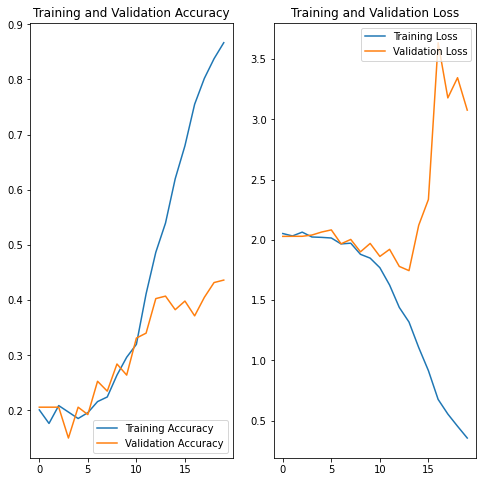

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

- There is evidence of overfitting, as the validation accuracy significantly dropped compared to training accuracy (from 86% to 43%)

In [25]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal",
                                                input_shape = (img_height, img_width,3)),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1)
])

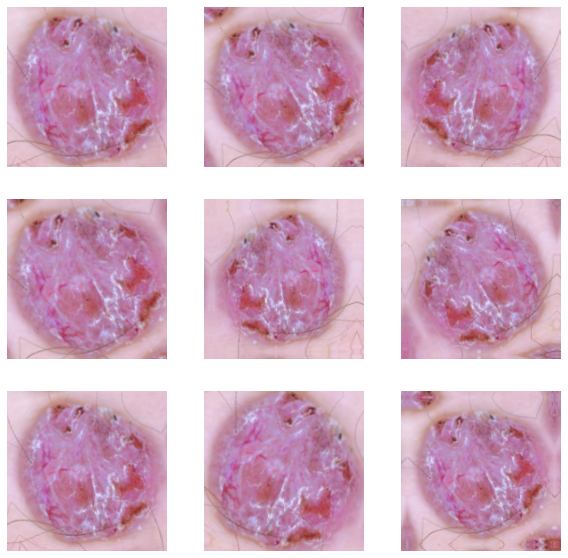

In [26]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for image, labels in val_ds.take(1):
    for i in range(9):        
        augmented_image = data_augmentation(image)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [37]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

# Dropout is not used as the model becomes too underfit. The model is not too complex to drop weights. 
# Overfit was due to low volume of data and adding data augmenattaion layer alone should help generalizing the input image

num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  
  data_augmentation,

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Flatten(),
  
  layers.Dense(512, activation='relu'), 
  layers.Dense(512, activation='relu'),


  layers.Dense(num_classes)
])

### Compiling the model

In [38]:
## Your code goes here
# Adam optimizer and SparseCategoricalCrossentropy loss function are chosen for this model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
# View the summary of all layers
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 conv2d_43 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 90, 90, 64)        18496     
                                                      

### Training the model

In [40]:
## Your code goes here, note: train your model for 20 epochs
## your training code
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 12s 197ms/step - loss: 2.0597 - accuracy: 0.2176 - val_loss: 1.8388 - val_accuracy: 0.3221
Epoch 2/20
56/56 [==============================] - 11s 194ms/step - loss: 1.7300 - accuracy: 0.3588 - val_loss: 1.7278 - val_accuracy: 0.3490
Epoch 3/20
56/56 [==============================] - 11s 192ms/step - loss: 1.6734 - accuracy: 0.3901 - val_loss: 1.8632 - val_accuracy: 0.3065
Epoch 4/20
56/56 [==============================] - 11s 193ms/step - loss: 1.6804 - accuracy: 0.4040 - val_loss: 1.6640 - val_accuracy: 0.4072
Epoch 5/20
56/56 [==============================] - 11s 192ms/step - loss: 1.5913 - accuracy: 0.4308 - val_loss: 1.6252 - val_accuracy: 0.4072
Epoch 6/20
56/56 [==============================] - 11s 192ms/step - loss: 1.5446 - accuracy: 0.4604 - val_loss: 1.4896 - val_accuracy: 0.4810
Epoch 7/20
56/56 [==============================] - 11s 193ms/step - loss: 1.4721 - accuracy: 0.4866 - val_loss: 1.4555 - val_accuracy: 0.4922

### Visualizing the results

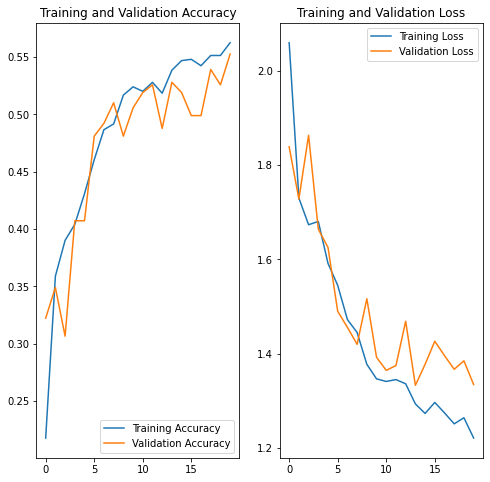

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

- After adding augmentation layer, the model no more overfits (the training and validation accuracy are closer, 56% and 55% respectively.
- But ~55% accuracy is not good enough

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [42]:
# Get path directory of all images

from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list[:10]

['/content/gdrive/MyDrive/ML_Projects/Train/actinic keratosis/ISIC_0030491.jpg',
 '/content/gdrive/MyDrive/ML_Projects/Train/actinic keratosis/ISIC_0029915.jpg',
 '/content/gdrive/MyDrive/ML_Projects/Train/actinic keratosis/ISIC_0030408.jpg',
 '/content/gdrive/MyDrive/ML_Projects/Train/actinic keratosis/ISIC_0028941.jpg',
 '/content/gdrive/MyDrive/ML_Projects/Train/actinic keratosis/ISIC_0029141.jpg',
 '/content/gdrive/MyDrive/ML_Projects/Train/actinic keratosis/ISIC_0027447.jpg',
 '/content/gdrive/MyDrive/ML_Projects/Train/actinic keratosis/ISIC_0028854.jpg',
 '/content/gdrive/MyDrive/ML_Projects/Train/actinic keratosis/ISIC_0030242.jpg',
 '/content/gdrive/MyDrive/ML_Projects/Train/actinic keratosis/ISIC_0027668.jpg',
 '/content/gdrive/MyDrive/ML_Projects/Train/actinic keratosis/ISIC_0029713.jpg']

In [43]:
# Get the category to which all the images belong

lable_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*','*.jpg'))]
lable_list[:10]

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis']

In [44]:
## Your code goes here.
original_df = pd.DataFrame(data=zip(path_list,lable_list), columns = ['Path','Label'])
original_df.head()

,Path,Label
0,/content/gdrive/MyDrive/ML_Projects/Train/acti...,actinic keratosis
1,/content/gdrive/MyDrive/ML_Projects/Train/acti...,actinic keratosis
2,/content/gdrive/MyDrive/ML_Projects/Train/acti...,actinic keratosis
3,/content/gdrive/MyDrive/ML_Projects/Train/acti...,actinic keratosis
4,/content/gdrive/MyDrive/ML_Projects/Train/acti...,actinic keratosis


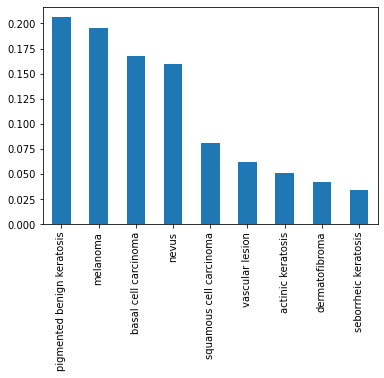

In [45]:
# Plot the distribution of classes in the training dataset

original_df['Label'].value_counts(normalize=True).plot.bar()
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
- seborrheic keratosis class has the least no.of samples

#### - Which classes dominate the data in terms proportionate number of samples?
- pigmented benign keratosis and melanoma


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [46]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [47]:
path_to_training_dataset='/content/gdrive/MyDrive/ML_Projects/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML_Projects/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4FC82428D0>: 100%|██████████| 500/500 [00:22<00:00, 22.32 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML_Projects/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5043D3AA50>: 100%|██████████| 500/500 [00:22<00:00, 22.02 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML_Projects/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4FCC0115D0>: 100%|██████████| 500/500 [00:22<00:00, 21.85 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML_Projects/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F5043D3AED0>: 100%|██████████| 500/500 [01:50<00:00,  4.51 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML_Projects/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7F5043E37490>: 100%|██████████| 500/500 [01:45<00:00,  4.72 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML_Projects/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4FCBCD9D90>: 100%|██████████| 500/500 [00:22<00:00, 22.58 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML_Projects/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F4FCBCD4E90>: 100%|██████████| 500/500 [00:51<00:00,  9.73 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML_Projects/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5043E7AA90>: 100%|██████████| 500/500 [00:22<00:00, 21.81 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML_Projects/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4FCC07CC50>: 100%|██████████| 500/500 [00:22<00:00, 21.83 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [48]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [49]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[:10]

['/content/gdrive/MyDrive/ML_Projects/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026905.jpg_987d07d9-034a-4e46-8cf0-32d7cf576ec7.jpg',
 '/content/gdrive/MyDrive/ML_Projects/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029659.jpg_42da25ff-27a5-4fcf-ba24-4cd6dcf3b142.jpg',
 '/content/gdrive/MyDrive/ML_Projects/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025957.jpg_8080f88d-c97b-45ca-a76a-82294d87c4ca.jpg',
 '/content/gdrive/MyDrive/ML_Projects/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030730.jpg_d5343986-02ac-4878-81a2-9697f0521da6.jpg',
 '/content/gdrive/MyDrive/ML_Projects/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026457.jpg_5173e74d-cd85-4981-a3ba-a5b0bcfc4174.jpg',
 '/content/gdrive/MyDrive/ML_Projects/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029713.jpg_584dd91d-01f2-4793-90c2-71f683daddc0.jpg',
 '/content/gdrive/MyDrive/ML_Projects/Train/actinic keratosis/ou

In [50]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:10]

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis']

In [51]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [52]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [53]:
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

In [54]:
df2['Label'].value_counts()

basal cell carcinoma          500
squamous cell carcinoma       500
vascular lesion               500
dermatofibroma                500
pigmented benign keratosis    500
melanoma                      500
nevus                         500
seborrheic keratosis          500
actinic keratosis             500
Name: Label, dtype: int64

In [55]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [56]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [57]:
data_dir_train='/content/gdrive/MyDrive/ML_Projects/Train'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [58]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [59]:
## your code goes here

from tensorflow.keras.regularizers import l2

num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  
  data_augmentation,

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Flatten(),
  
  layers.Dense(512, activation='relu'),
  layers.Dense(512, activation='relu'),

  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [60]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [61]:
# View the summary of all layers
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_48 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_49 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 180, 180, 32)     128       
 hNormalization)                                     

#### **Todo:**  Train your model

In [62]:
## Your code goes here, use 30 epochs.

epochs = 30

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 55s 307ms/step - loss: 4.4960 - accuracy: 0.3284 - val_loss: 9.0449 - val_accuracy: 0.0765
Epoch 2/30
169/169 [==============================] - 50s 289ms/step - loss: 1.5403 - accuracy: 0.4286 - val_loss: 6.6921 - val_accuracy: 0.1611
Epoch 3/30
169/169 [==============================] - 50s 289ms/step - loss: 1.4876 - accuracy: 0.4371 - val_loss: 1.8312 - val_accuracy: 0.3883
Epoch 4/30
169/169 [==============================] - 50s 288ms/step - loss: 1.3744 - accuracy: 0.4837 - val_loss: 1.7833 - val_accuracy: 0.4128
Epoch 5/30
169/169 [==============================] - 50s 288ms/step - loss: 1.3443 - accuracy: 0.4963 - val_loss: 1.4706 - val_accuracy: 0.4751
Epoch 6/30
169/169 [==============================] - 50s 286ms/step - loss: 1.2918 - accuracy: 0.5134 - val_loss: 1.3447 - val_accuracy: 0.5174
Epoch 7/30
169/169 [==============================] - 50s 288ms/step - loss: 1.2250 - accuracy: 0.5210 - val_loss: 1.5523 - val_ac

#### **Todo:**  Visualize the model results

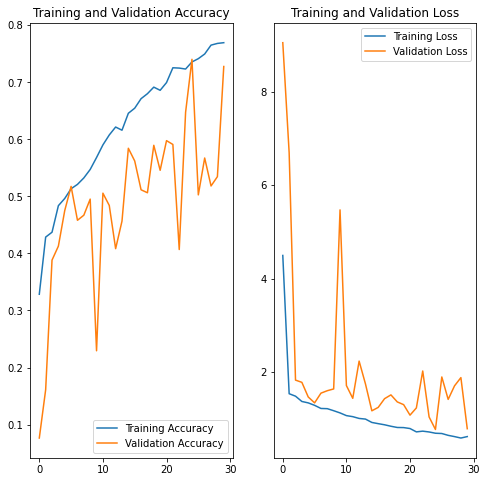

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- Yes, I was able to get rid of overfitting by using augmentation layer and able to get rid of underfitting by adding augmentor-generated images to rectify class-imbalance
- Yes, Class-rebalance helped to overcome model underfitting